## All SEDs

---

### Imports

In [1]:
import utils
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import c
from mpl_toolkits.axes_grid1 import make_axes_locatable
utils.rcparams()

In [2]:
# Load the data and gather the primary and secondary samples
list_sources = utils.full_loader('catalogue_combined.csv')
primary_sample = list_sources[list_sources['sample'] == 2]
primary_sample = primary_sample.reset_index()

# Split samples into SPT and HerBS sources
spt_sample = primary_sample[primary_sample['spt_herbs'] == 1]
herbs_sample = primary_sample[primary_sample['spt_herbs'] == 2]
spt_sample = spt_sample.reset_index()
herbs_sample = herbs_sample.reset_index()

print('Number of SPT sources = {}'.format(len(spt_sample)))
print('Number of HerBS sources = {}'.format(len(herbs_sample)))

Number of SPT sources = 79
Number of HerBS sources = 30


In [3]:
# Load optically thin results
spt_catalogue_ot, spt_catalogue_ot_df = utils.load_catalogue('model_results', 'spt_catalogue_ot'), utils.load_catalogue('model_results', 'spt_catalogue_ot_summary')
herbs_catalogue_ot, herbs_catalogue_ot_df = utils.load_catalogue('model_results', 'herbs_catalogue_ot'), utils.load_catalogue('model_results', 'herbs_catalogue_ot_summary')

# Load general opacity (lambda thick = 100 microns) results
spt_catalogue_go100, spt_catalogue_go100_df = utils.load_catalogue('model_results', 'spt_catalogue_go_100'), utils.load_catalogue('model_results', 'spt_catalogue_go_100_summary')
herbs_catalogue_go100, herbs_catalogue_go100_df = utils.load_catalogue('model_results', 'herbs_catalogue_go_100'), utils.load_catalogue('model_results', 'herbs_catalogue_go_100_summary')

# Load general opacity (lambda thick = 200 microns) results
spt_catalogue_go200, spt_catalogue_go200_df = utils.load_catalogue('model_results', 'spt_catalogue_go_200'), utils.load_catalogue('model_results', 'spt_catalogue_go_200_summary')
herbs_catalogue_go200, herbs_catalogue_go200_df = utils.load_catalogue('model_results', 'herbs_catalogue_go_200'), utils.load_catalogue('model_results', 'herbs_catalogue_go_200_summary')

# Load general opacity (known continuum area) results
spt_catalogue_gor, spt_catalogue_gor_df = utils.load_catalogue('model_results', 'spt_catalogue_go_r'), utils.load_catalogue('model_results', 'spt_catalogue_go_r_summary')

---

### Grid of SEDs

In [4]:
def plot_grid(n_rows, n_cols, catalogue, plot_colour, file_name):
    """
    Plots a grid of SEDs with residuals
    
    :param n_rows: Number of rows
    :param n_cols: Number of columns
    :param catalogue: Catalogue of galaxies
    :param plot_colour: Colour of plot
    :param file_name: Name of plot file when saved
    """
    # Create a grid for all SEDs
    n_total = n_rows*n_cols
    n_used = len(catalogue)
    n_unused = n_total - n_used
    
    width = 4*n_cols
    height = 3*n_rows

    # Determine a range of observed frequencies
    wave_obs_um_range = np.linspace(5,9000,10000)
    wave_obs_m_range = wave_obs_um_range*1e-6
    freq_obs_range = c.value/wave_obs_m_range

    fig, axs = plt.subplots(n_rows,n_cols,sharex=True,sharey=True,figsize=(width, height))
    fig.subplots_adjust(hspace=0, wspace=0)

    for galaxy, ax in zip(catalogue, axs.ravel()):
        # For each galaxy determine rest frame frequencies
        wave_rest_um_range = wave_obs_um_range/(1+galaxy.redshift)
        freq_rest_range = freq_obs_range*(1+galaxy.redshift)

        # Plot the SED as error bars and best fitting line
        ax.errorbar(galaxy.wavelength_rest_um, galaxy.flux_jy, yerr=galaxy.fluxerr_jy, fmt='o')
        ax.plot(wave_rest_um_range, galaxy.sed(freq_rest_range, galaxy.best_theta), c=plot_colour)

        # Sample SEDs for error ranges
        sample_thetas, _ = galaxy.sample_walkers(500)
        low, high = np.percentile([galaxy.sed(freq_rest_range, theta) for theta in sample_thetas], [16,84], axis=0)
        ax.fill_between(wave_rest_um_range, high, low, color=plot_colour, alpha=0.25)

        ax.set_xlim(8e0,2e3)
        ax.set_ylim(8e-5, 1e0)
        ax.loglog()

        # Create a subplot for the residuals
        divider = make_axes_locatable(ax)
        ax2 = divider.append_axes("bottom", size="25%", pad=0, sharex=ax)
        ax2.plot(galaxy.wavelength_rest_um, galaxy.residuals(), 'o-')
        ax2.axhline(0, linestyle='--')
        ax2.set_ylim(-5,5)

        # Create a box of text including information on the source
        result_string = '\n'.join((str(galaxy.name),
                                   r'z = {:.2f}'.format(galaxy.redshift),
                                   r'$\chi^2_\nu$ = {:.2f}'.format(galaxy.reduced_chi_squared(galaxy.best_theta))))
        ax.text(0.25,0.45,result_string, transform=ax.transAxes, fontsize=18, verticalalignment='top')

    # Make unused plots grey
    if n_unused > 0:
        for ax in axs.ravel()[-n_unused:]:
            ax.set_facecolor('gray')

    fig.supxlabel(r'Rest Frame Wavelength [$\mu$m]', fontsize=10*n_cols, y=0.075)
    fig.supylabel(r'Flux Density [Jy] + Residual $(S_\nu - S_{\nu,\textrm{model}})/\sigma_{S_\nu}$', fontsize=10*n_cols)
    plt.savefig(os.getcwd() + '/figures/'+file_name+'.pdf', dpi=1000)
    plt.show()

---

### Optically Thin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


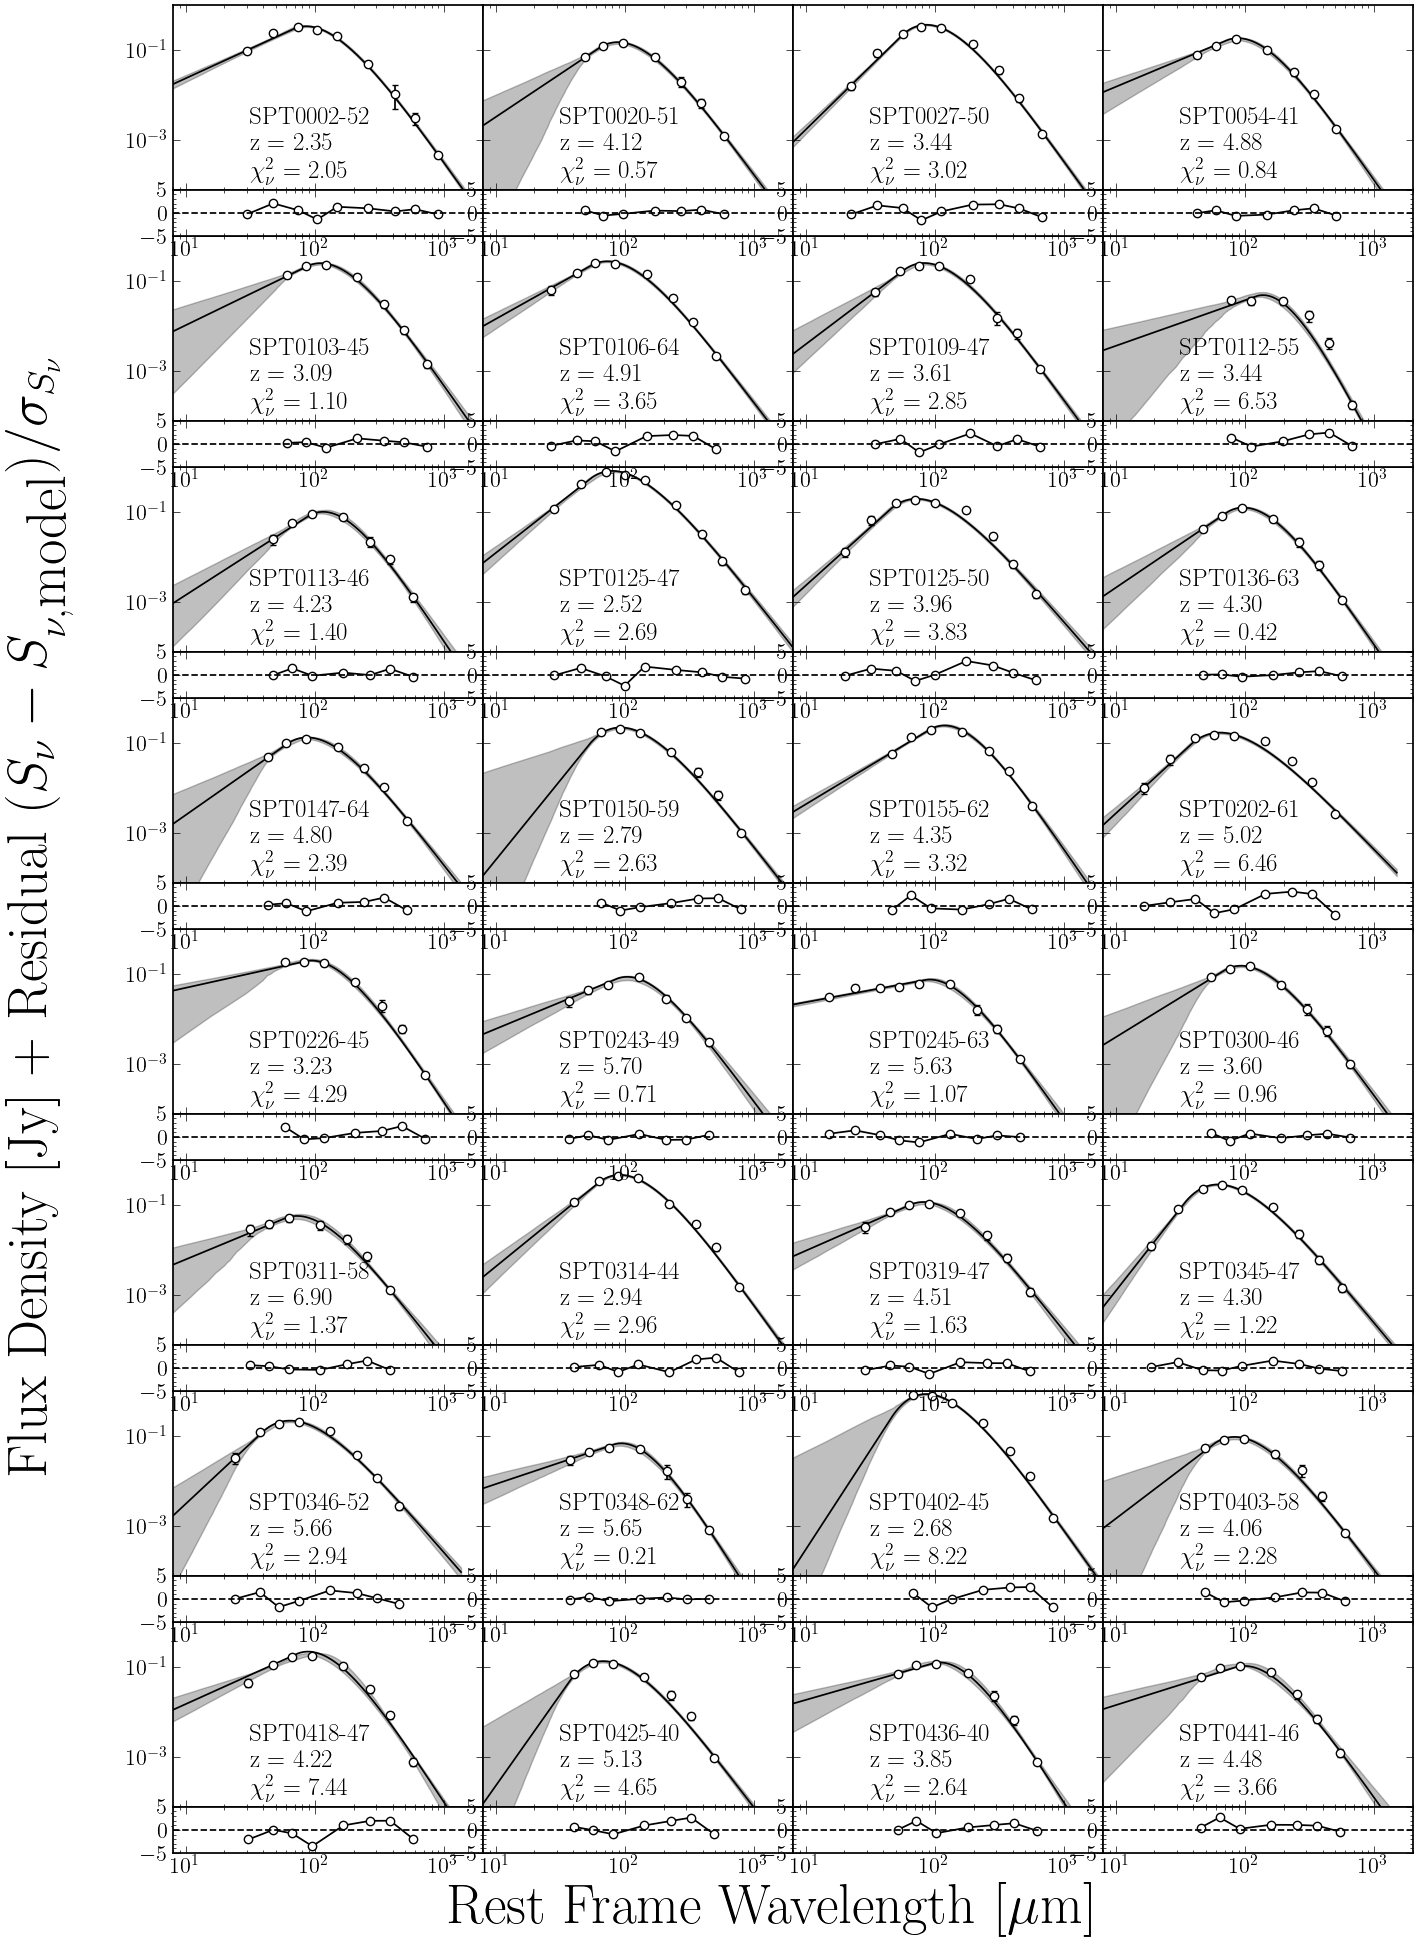

In [5]:
# SPT - Part 1
plot_grid(8, 4, spt_catalogue_ot[:32], 'k', 'Figure_D_1_part1')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


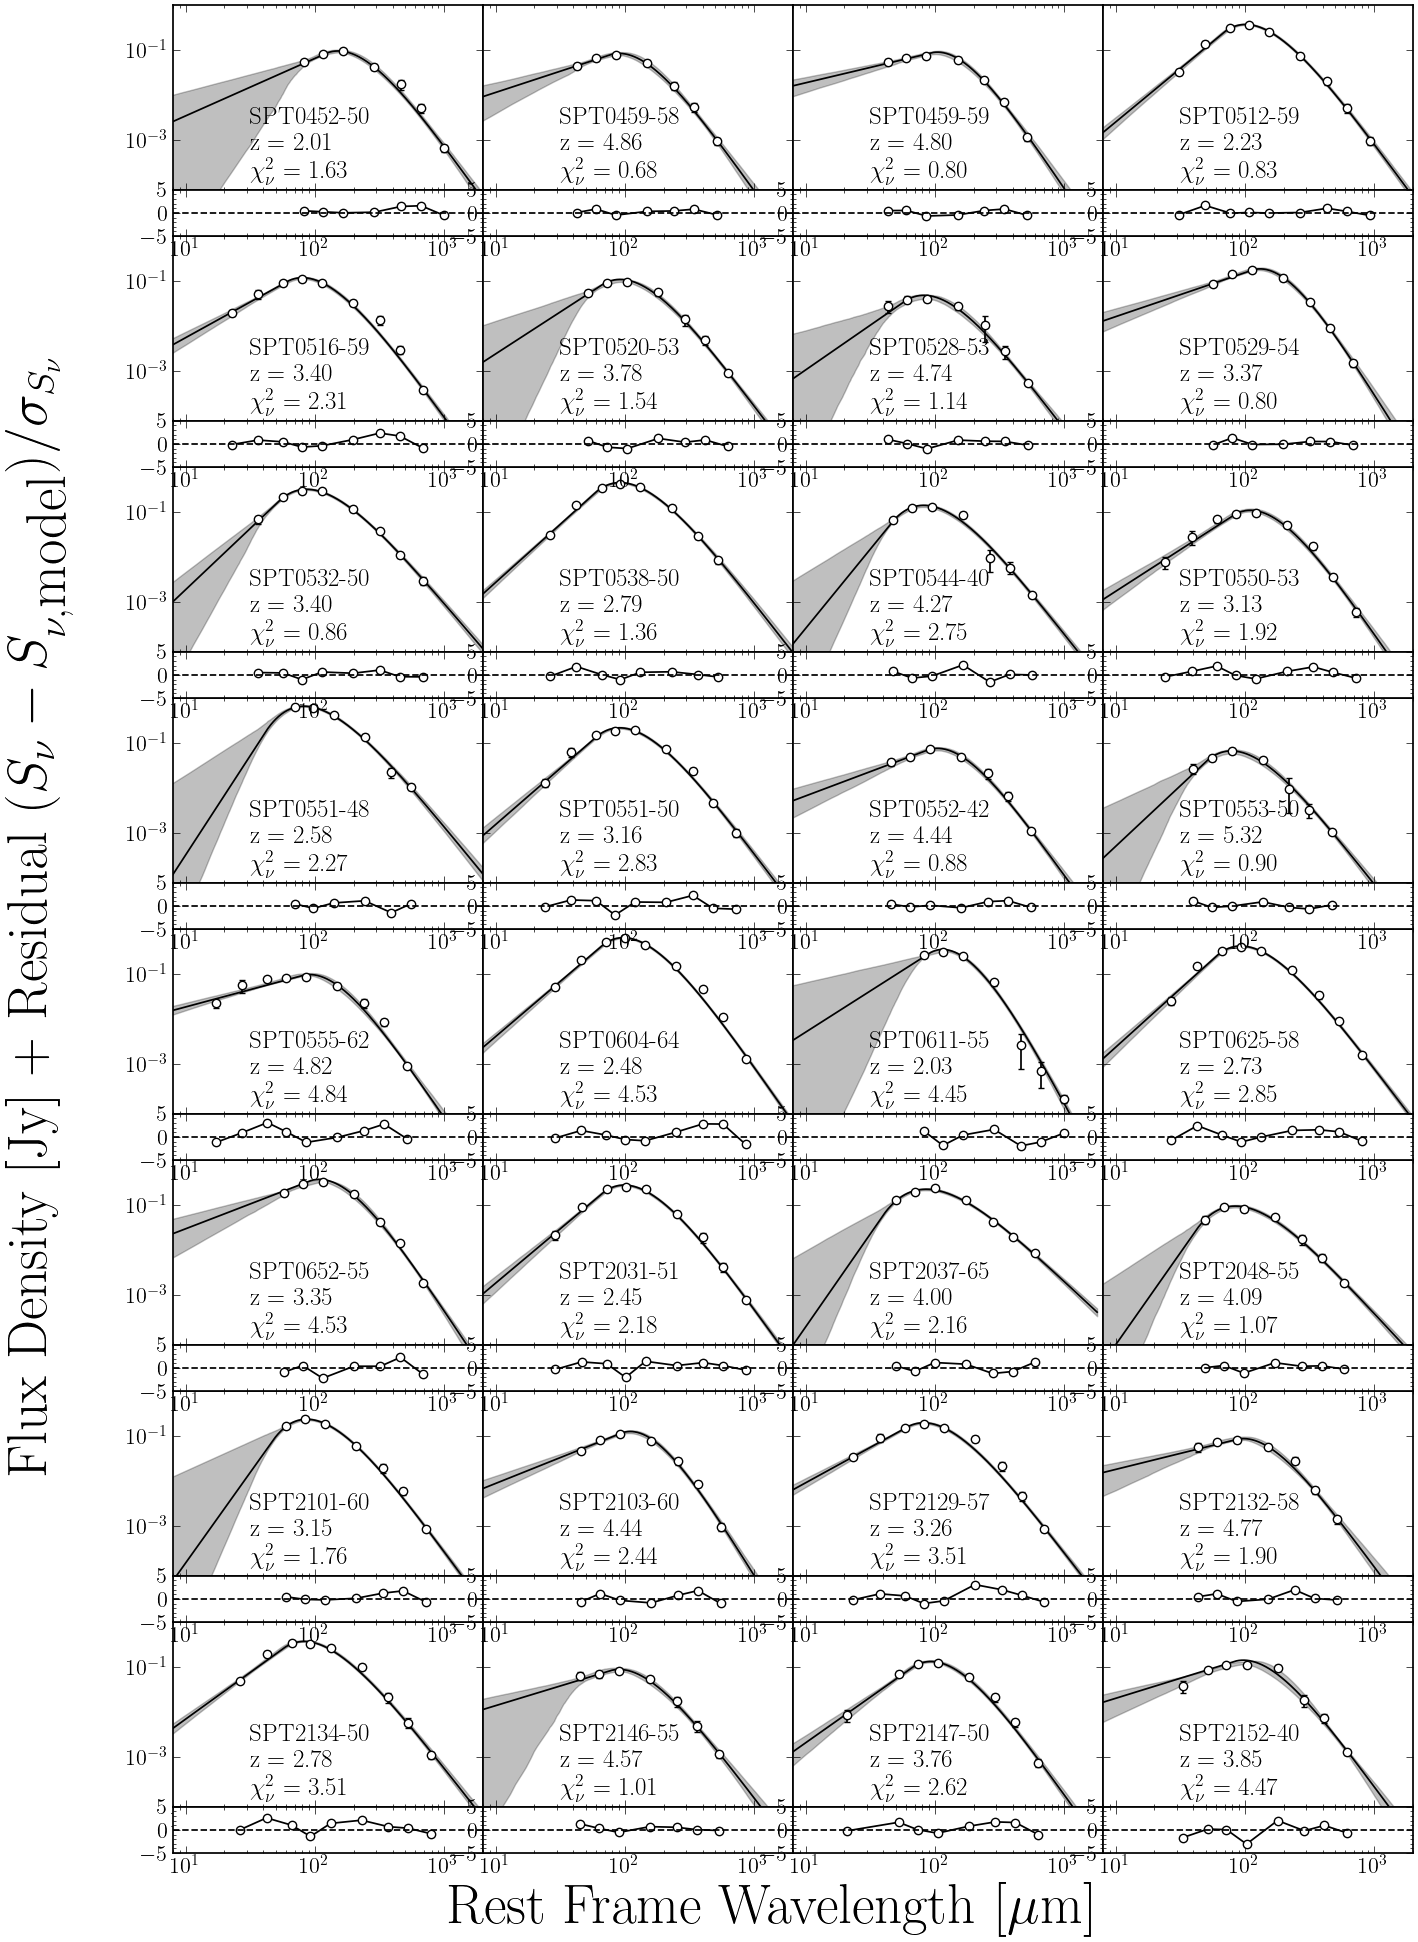

In [6]:
# SPT - Part 2
plot_grid(8, 4, spt_catalogue_ot[32:64], 'k', 'Figure_D_1_part2')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


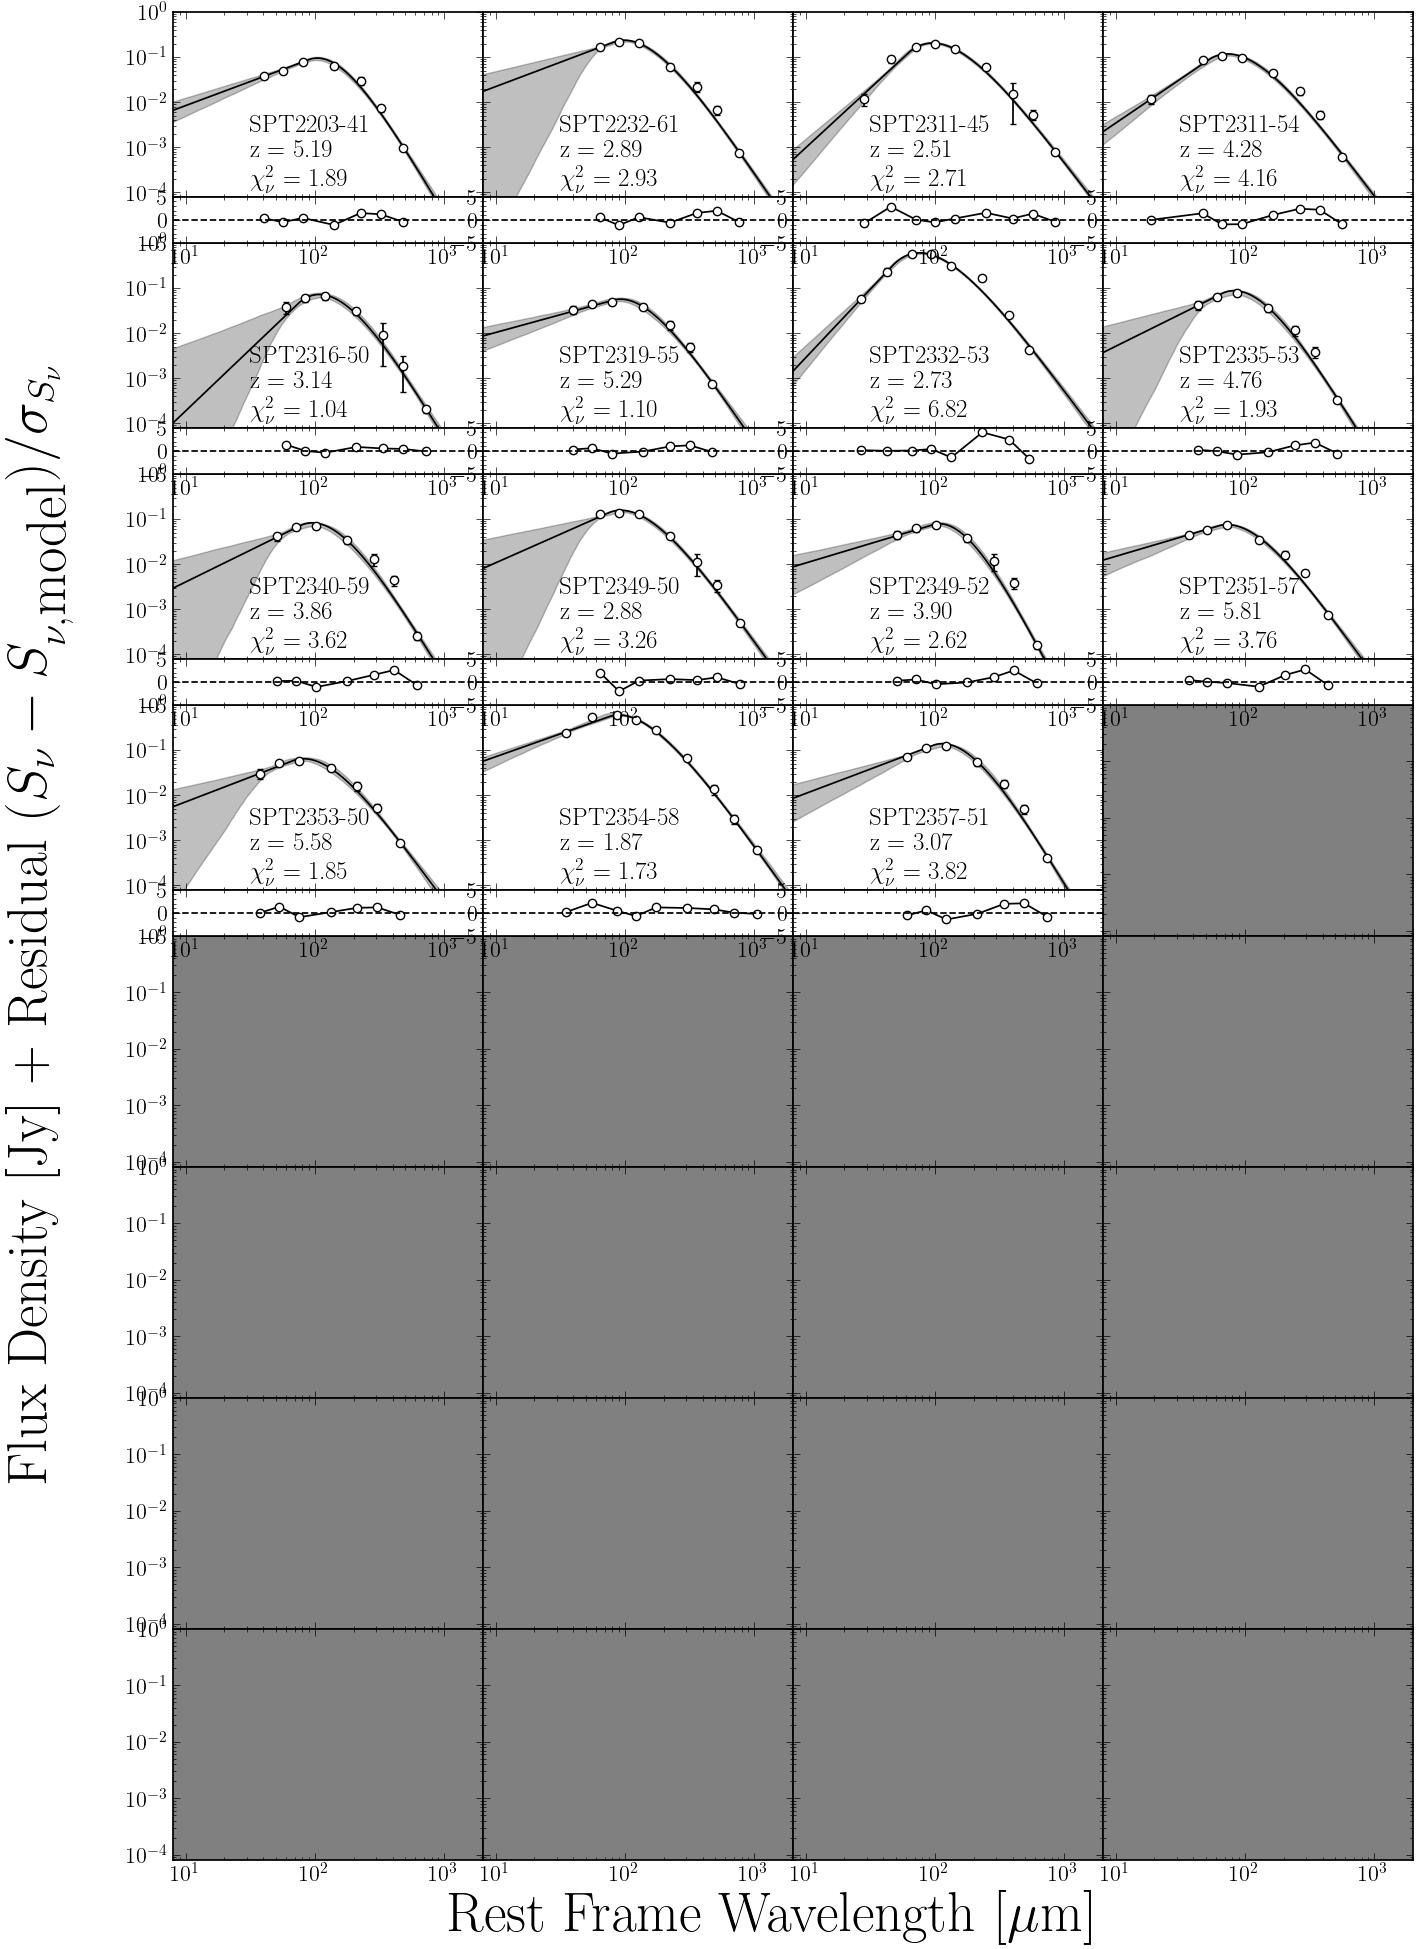

In [7]:
# SPT - Part 3
plot_grid(8, 4, spt_catalogue_ot[64:], 'k', 'Figure_D_1_part3')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


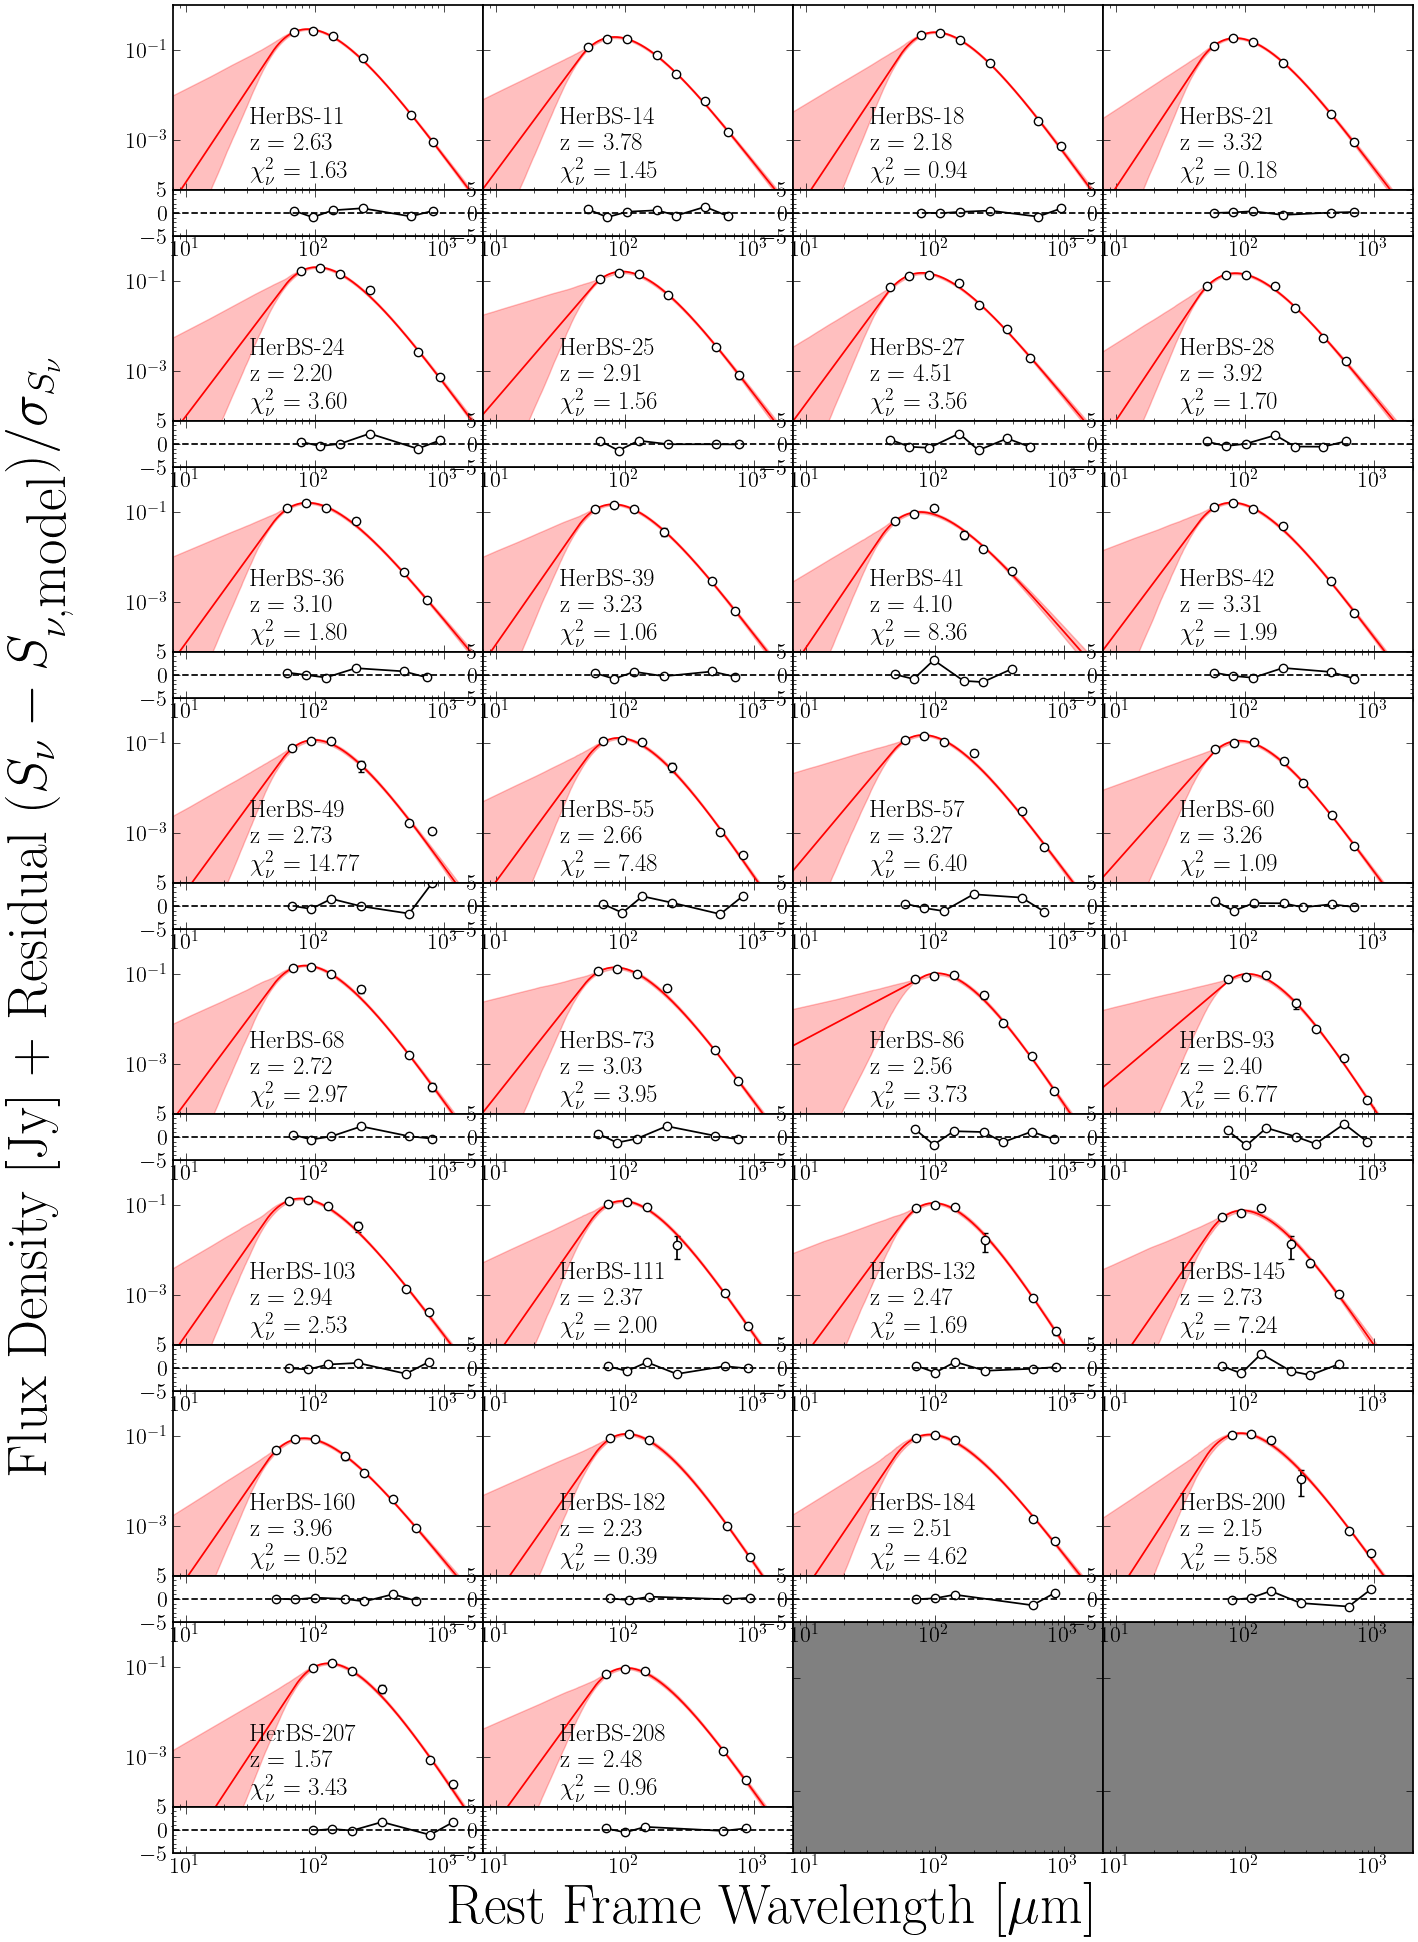

In [8]:
# HerBS
plot_grid(8, 4, herbs_catalogue_ot, 'r', 'Figure_C_1')

---

### General Opacity (100 microns)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


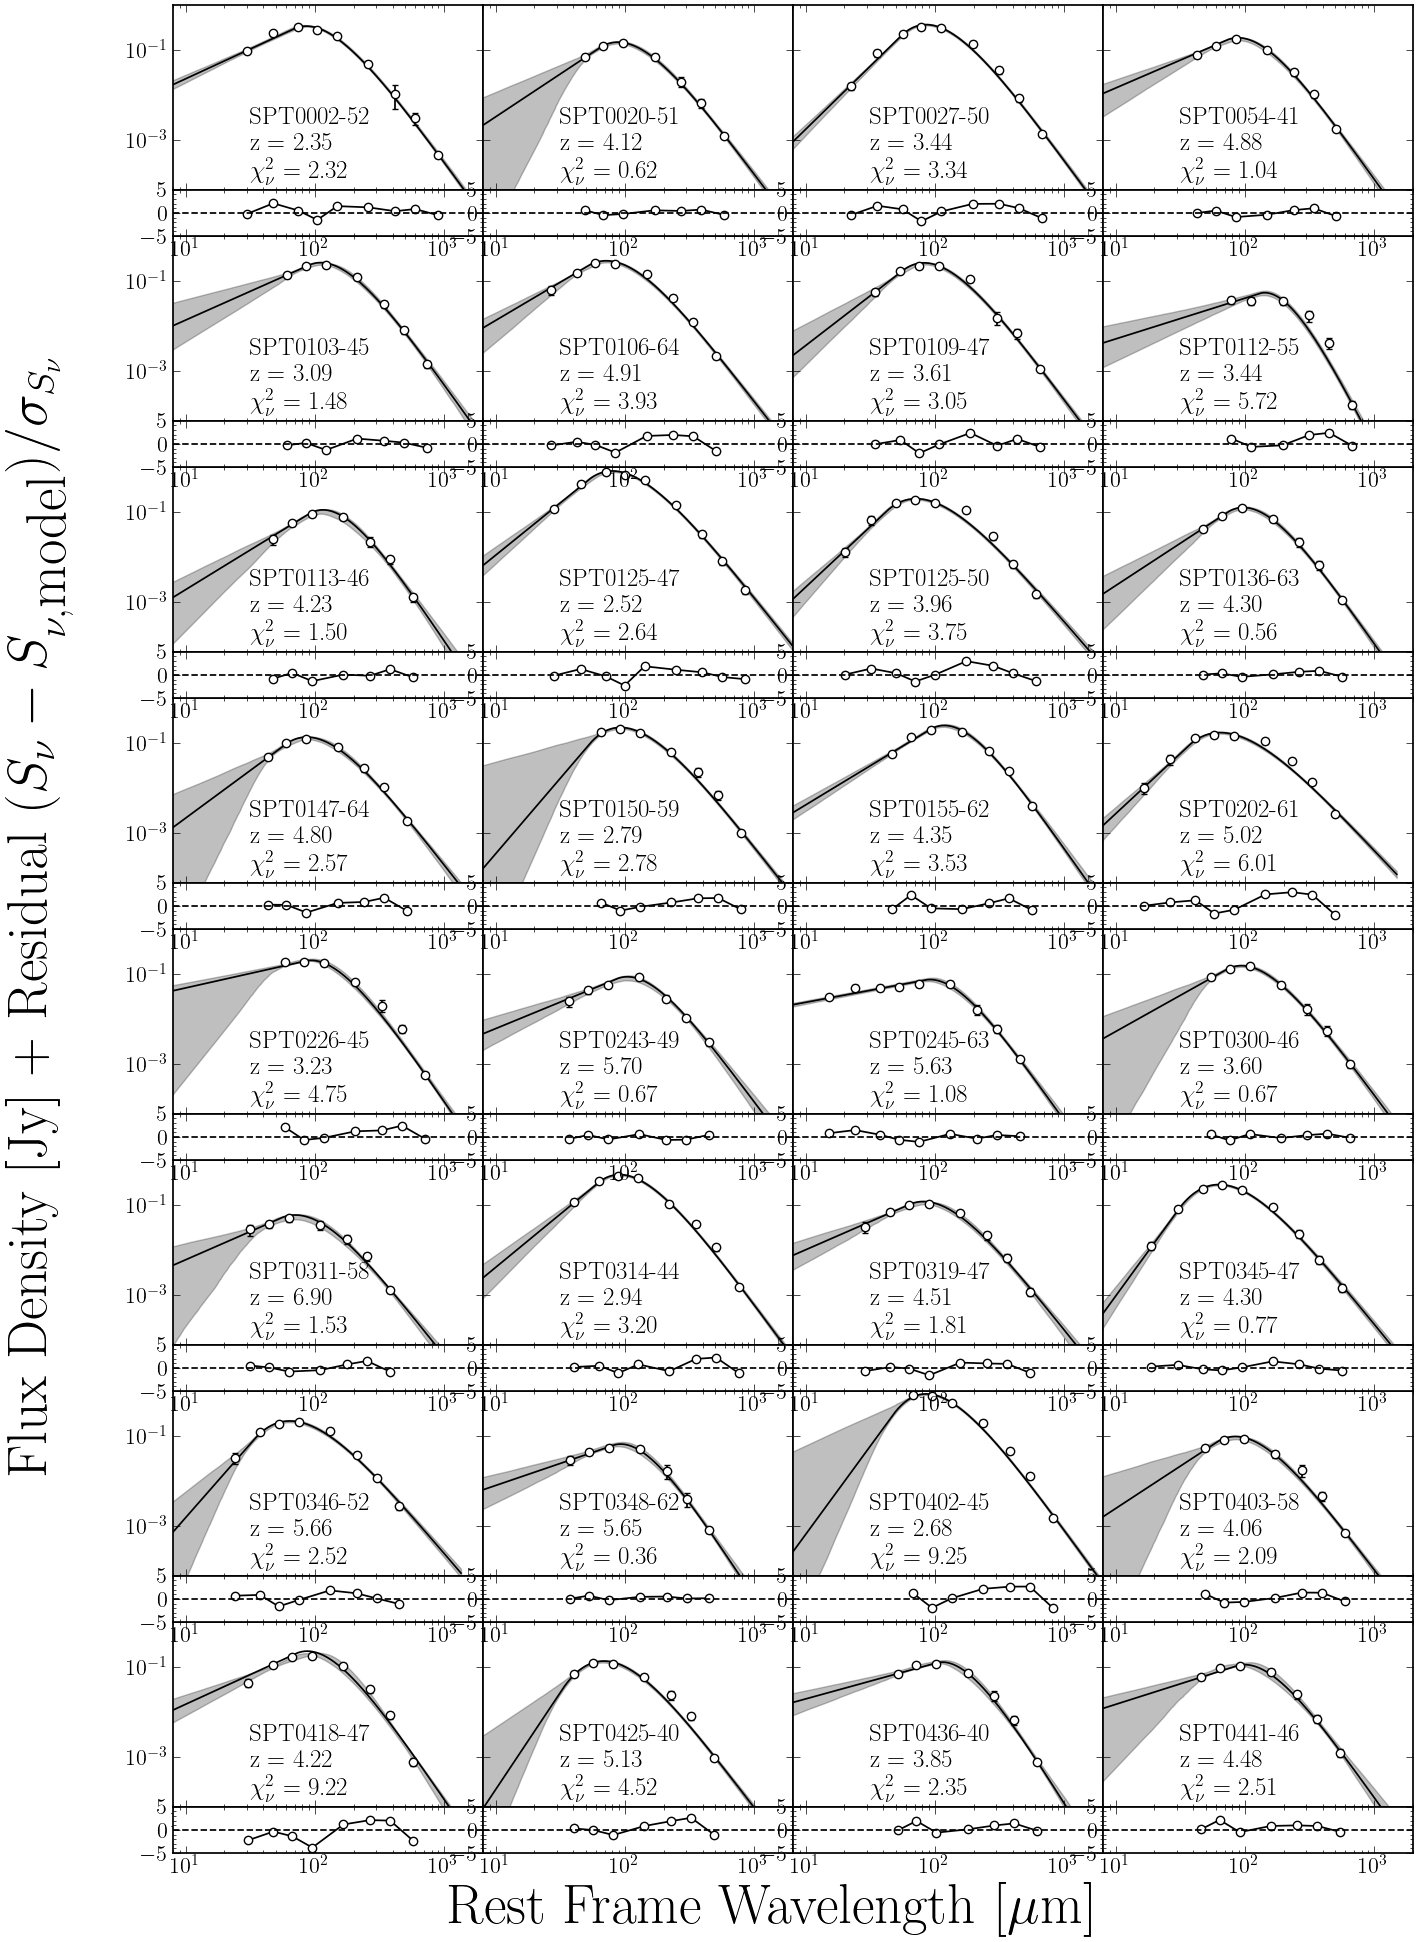

In [9]:
# SPT - Part 1
plot_grid(8, 4, spt_catalogue_go100[:32], 'k', 'Figure_D_2_part1')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


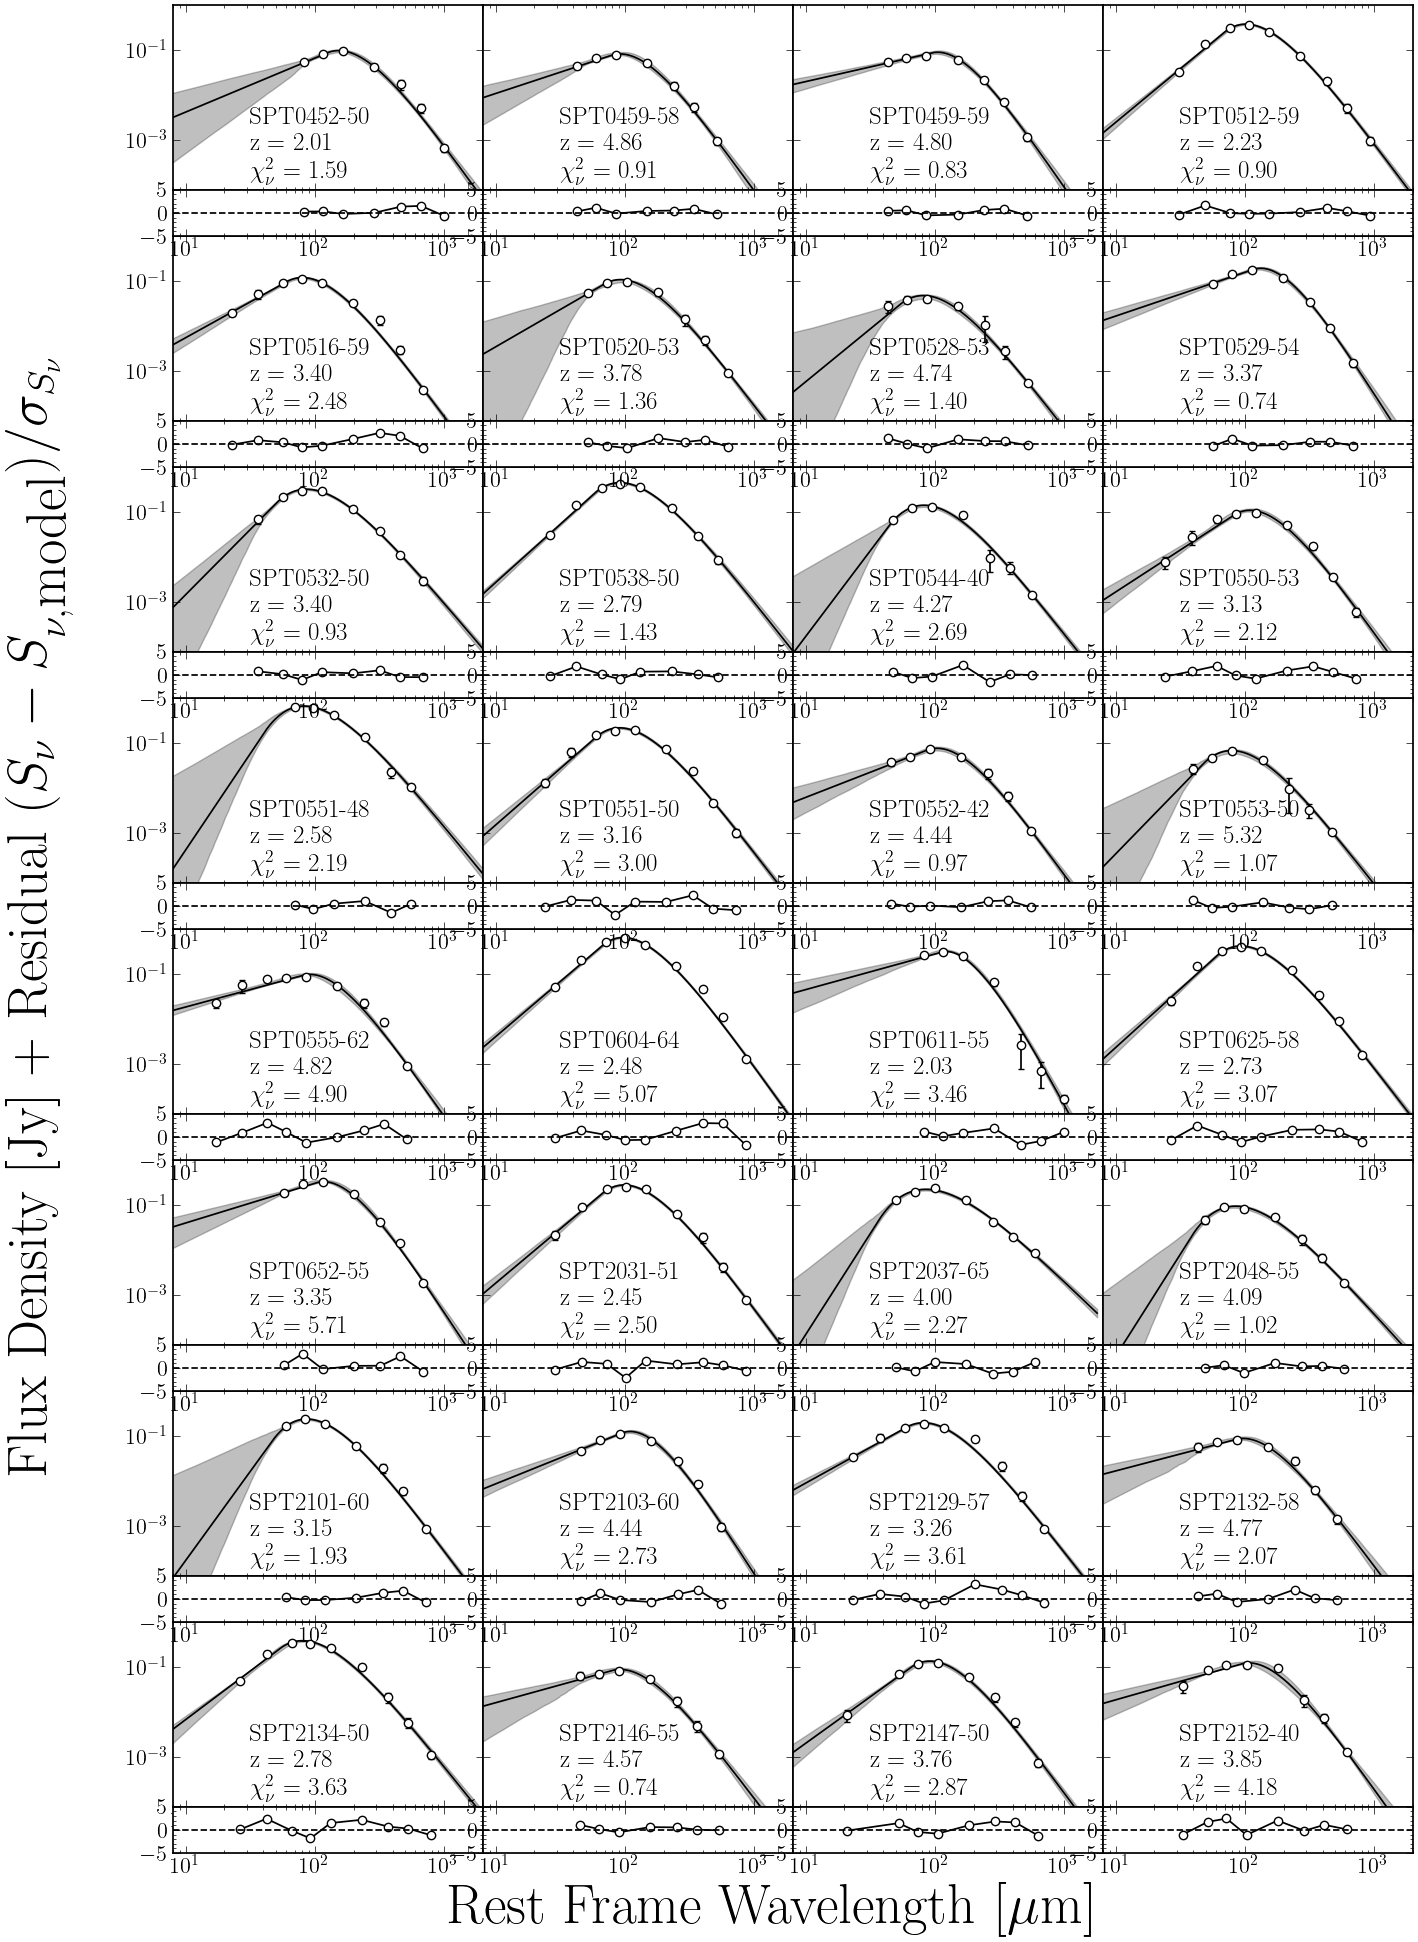

In [10]:
# SPT - Part 2
plot_grid(8, 4, spt_catalogue_go100[32:64], 'k', 'Figure_D_2_part2')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


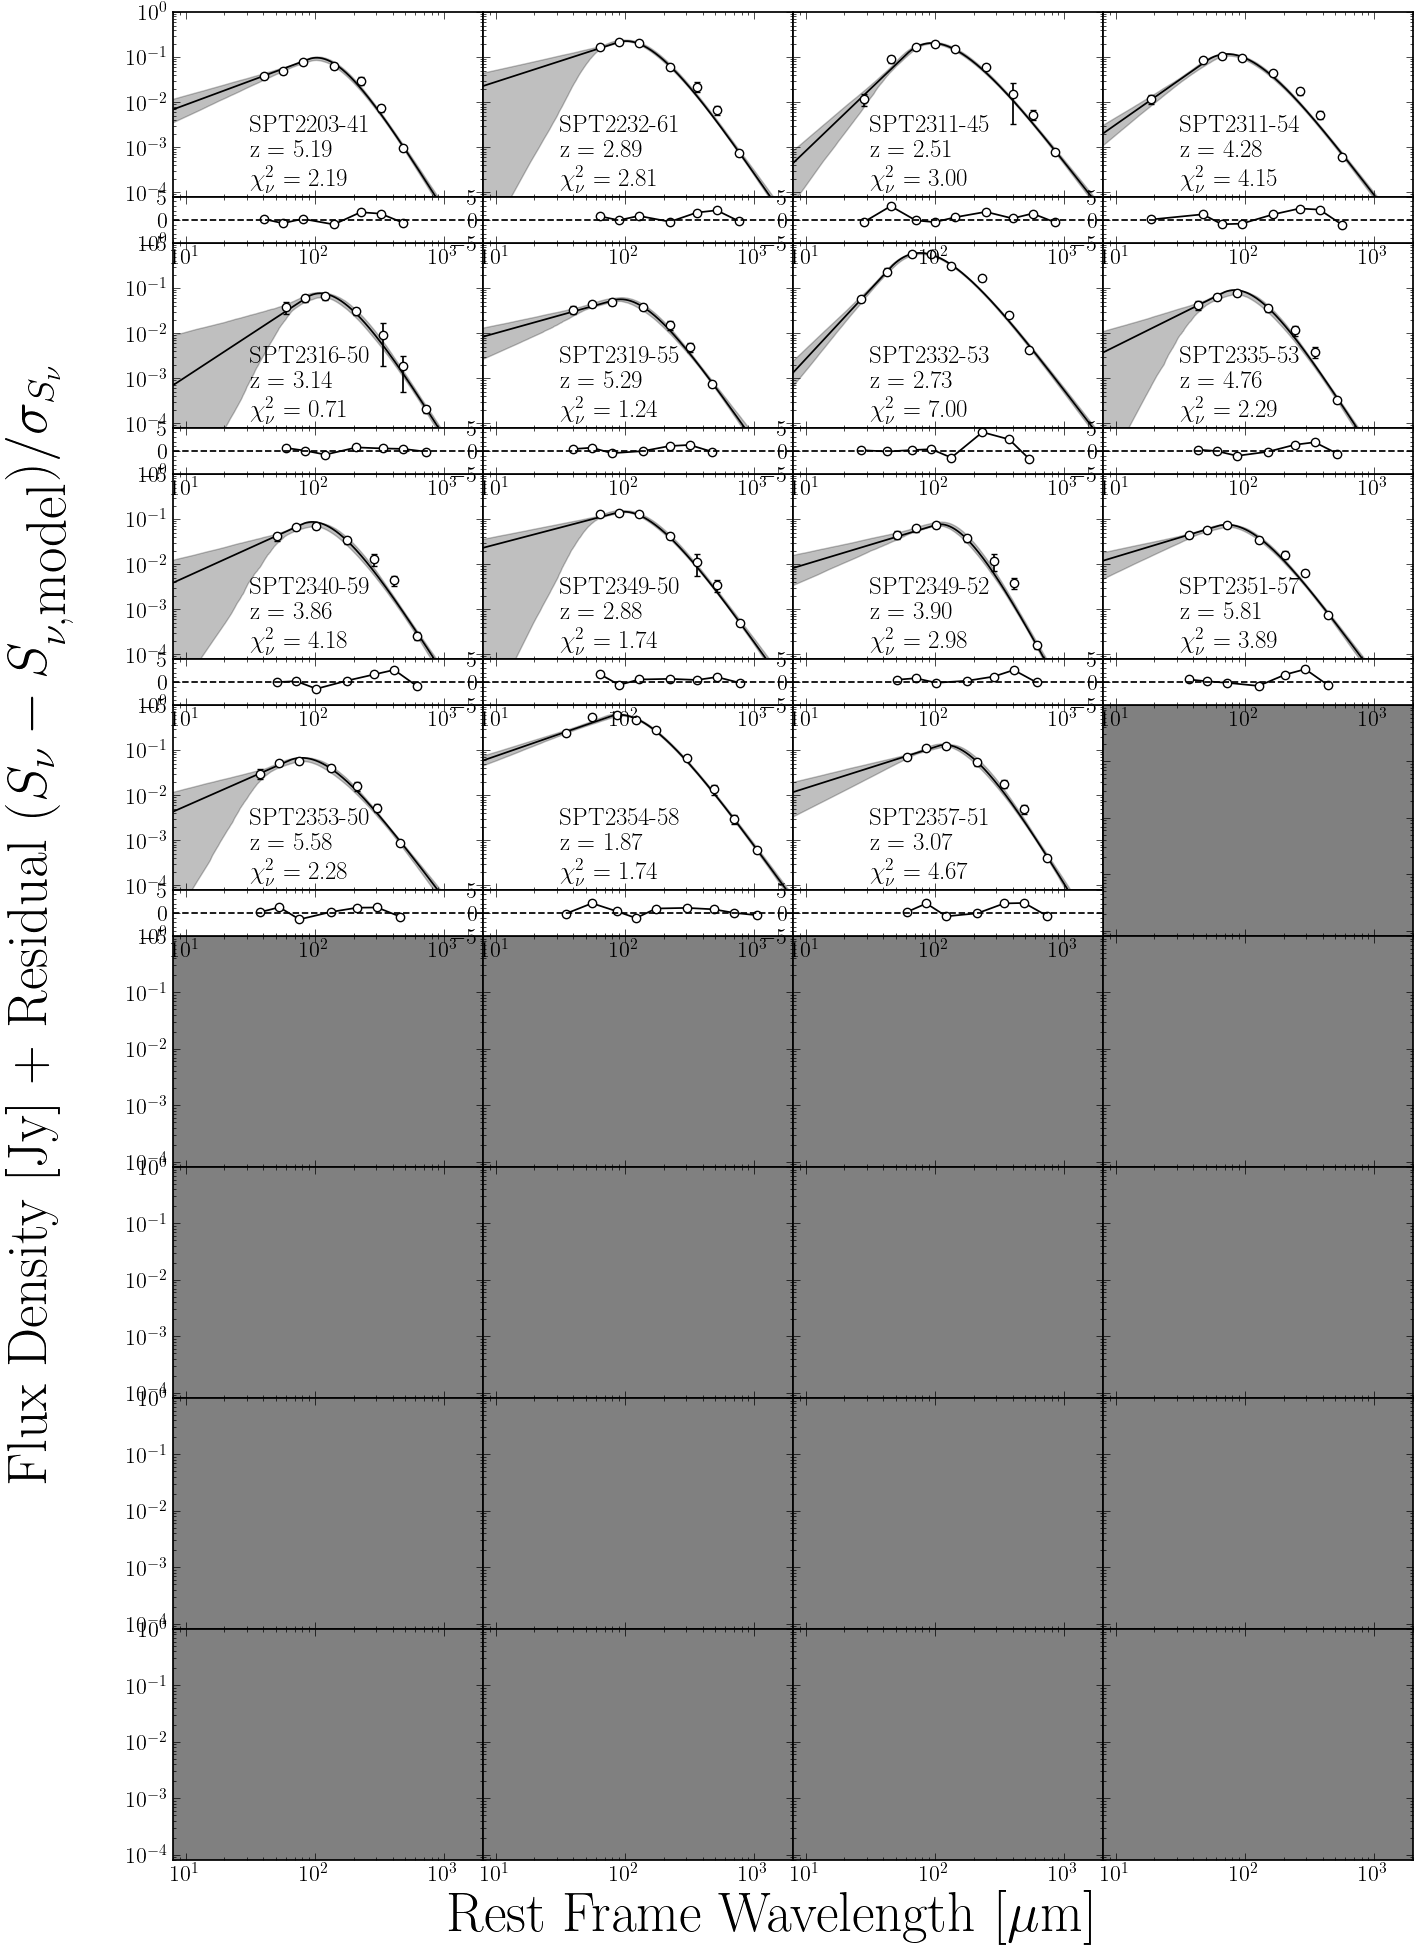

In [11]:
# SPT - Part 3
plot_grid(8, 4, spt_catalogue_go100[64:], 'k', 'Figure_D_2_part3')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


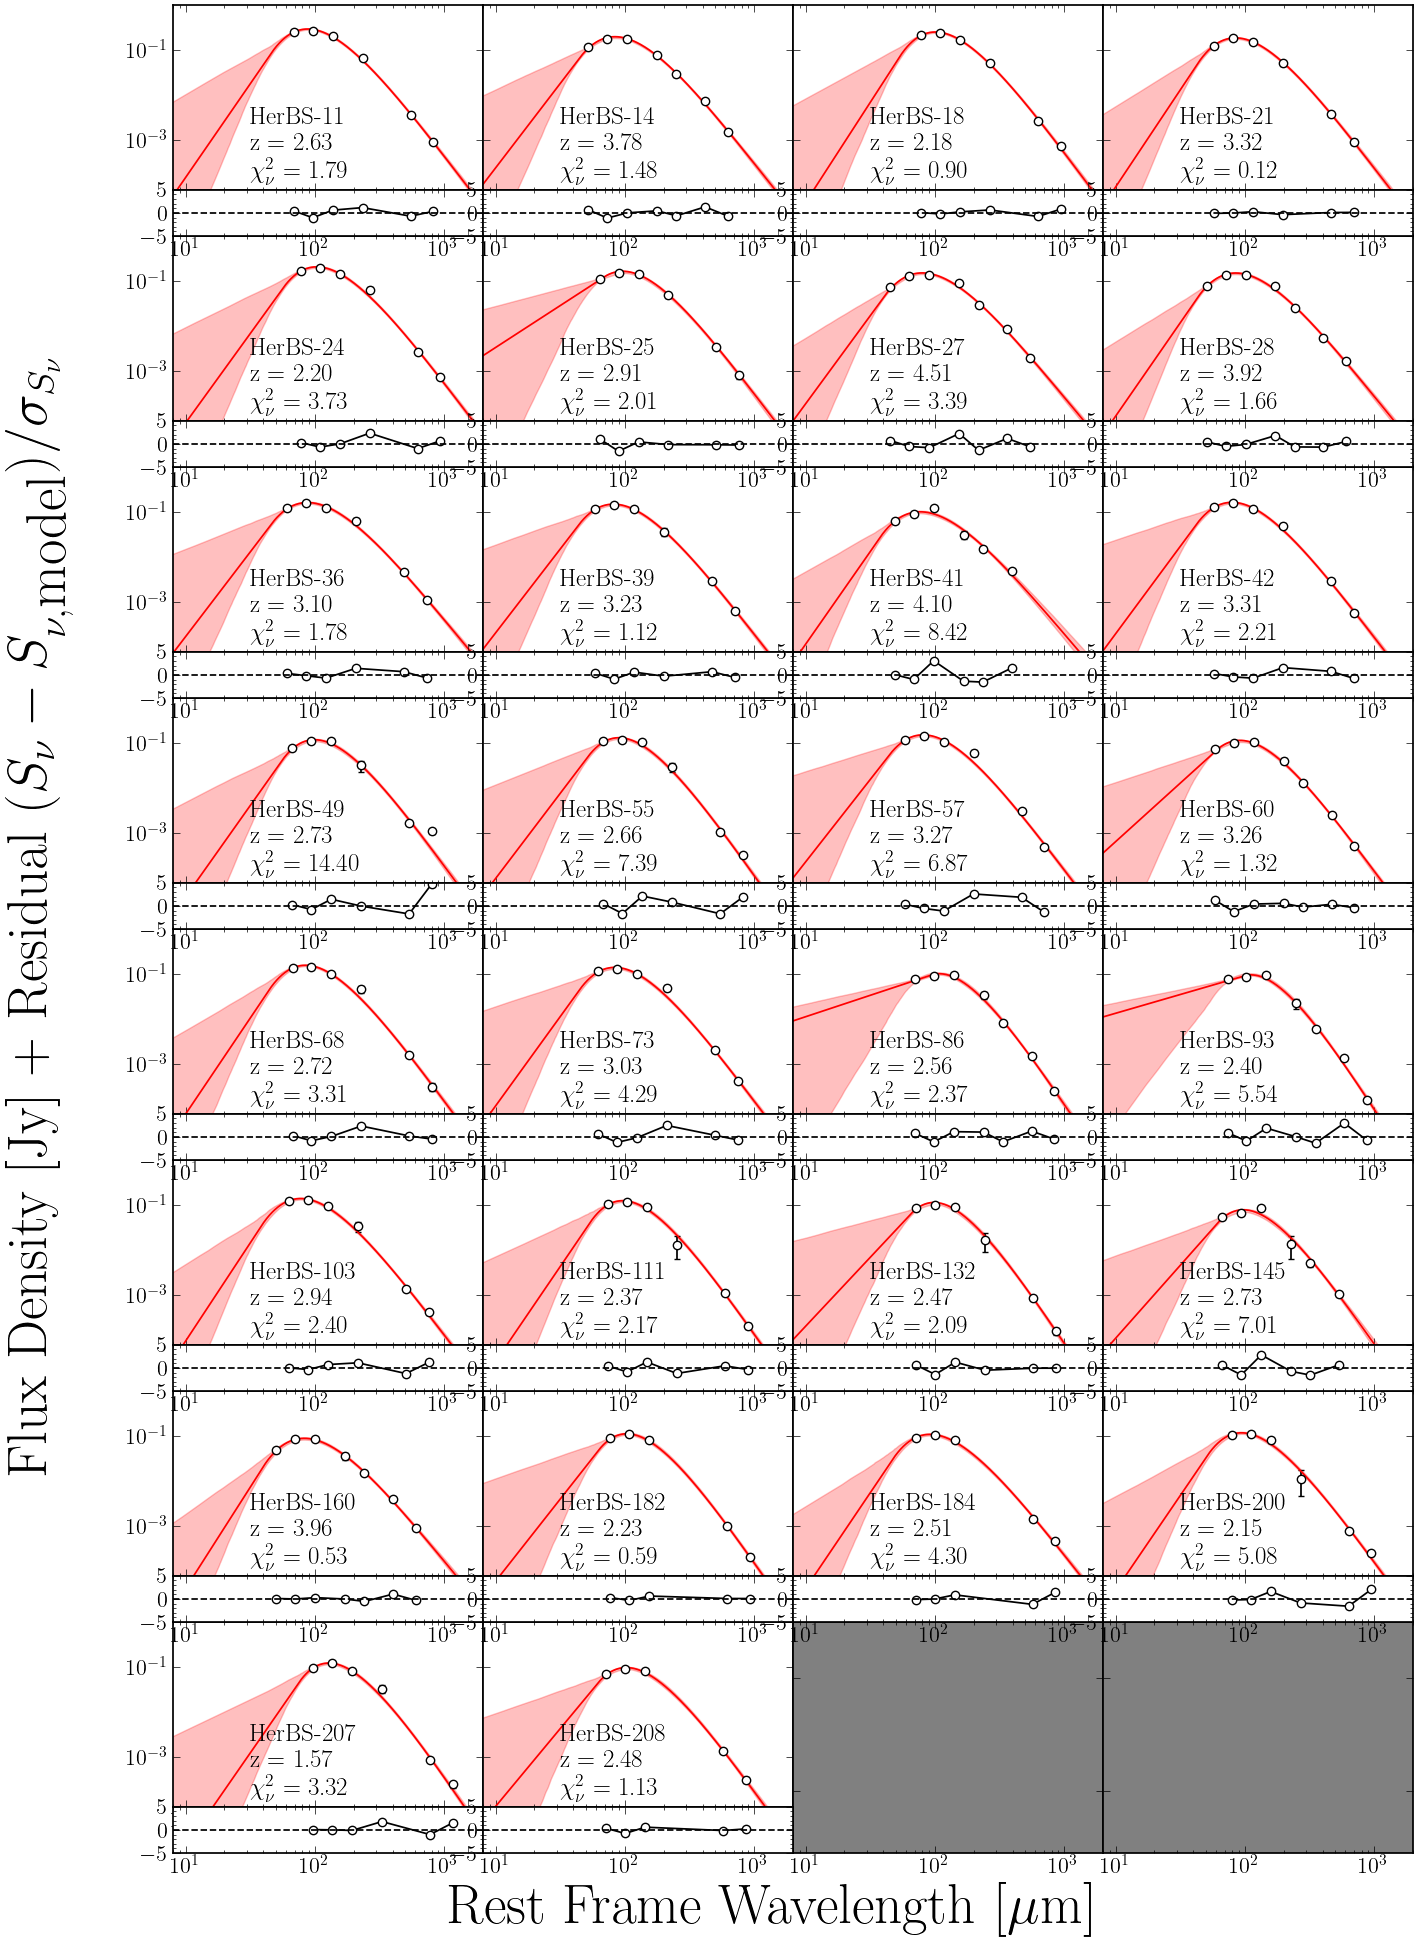

In [12]:
# HerBS
plot_grid(8, 4, herbs_catalogue_go100, 'r', 'Figure_C_2')

---

### General Opacity (200 microns)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


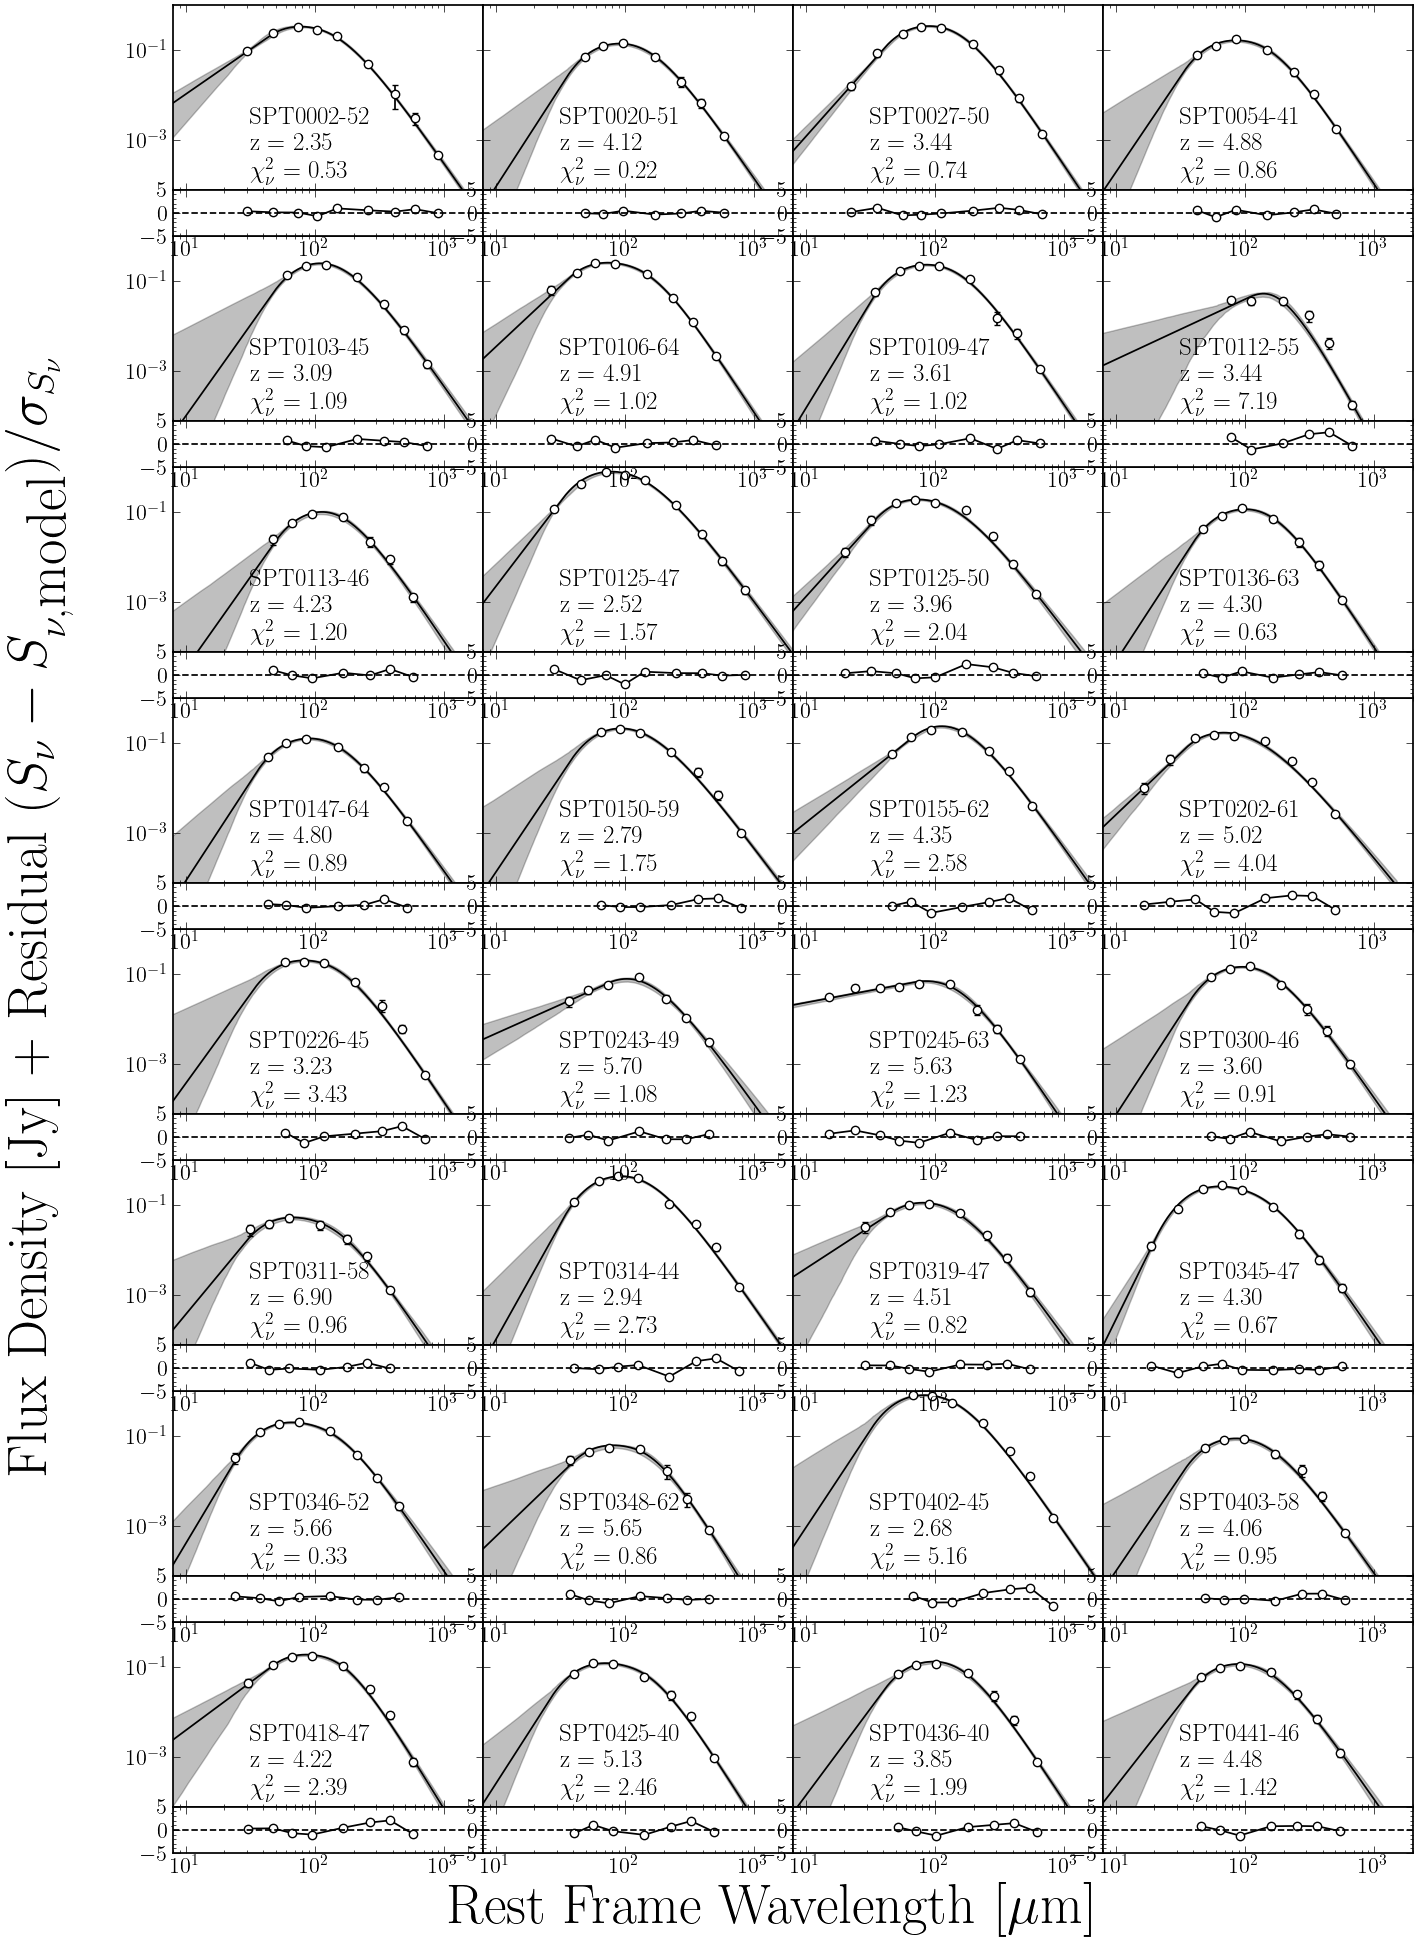

In [13]:
# SPT - Part 1
plot_grid(8, 4, spt_catalogue_go200[:32], 'k', 'Figure_D_3_part1')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


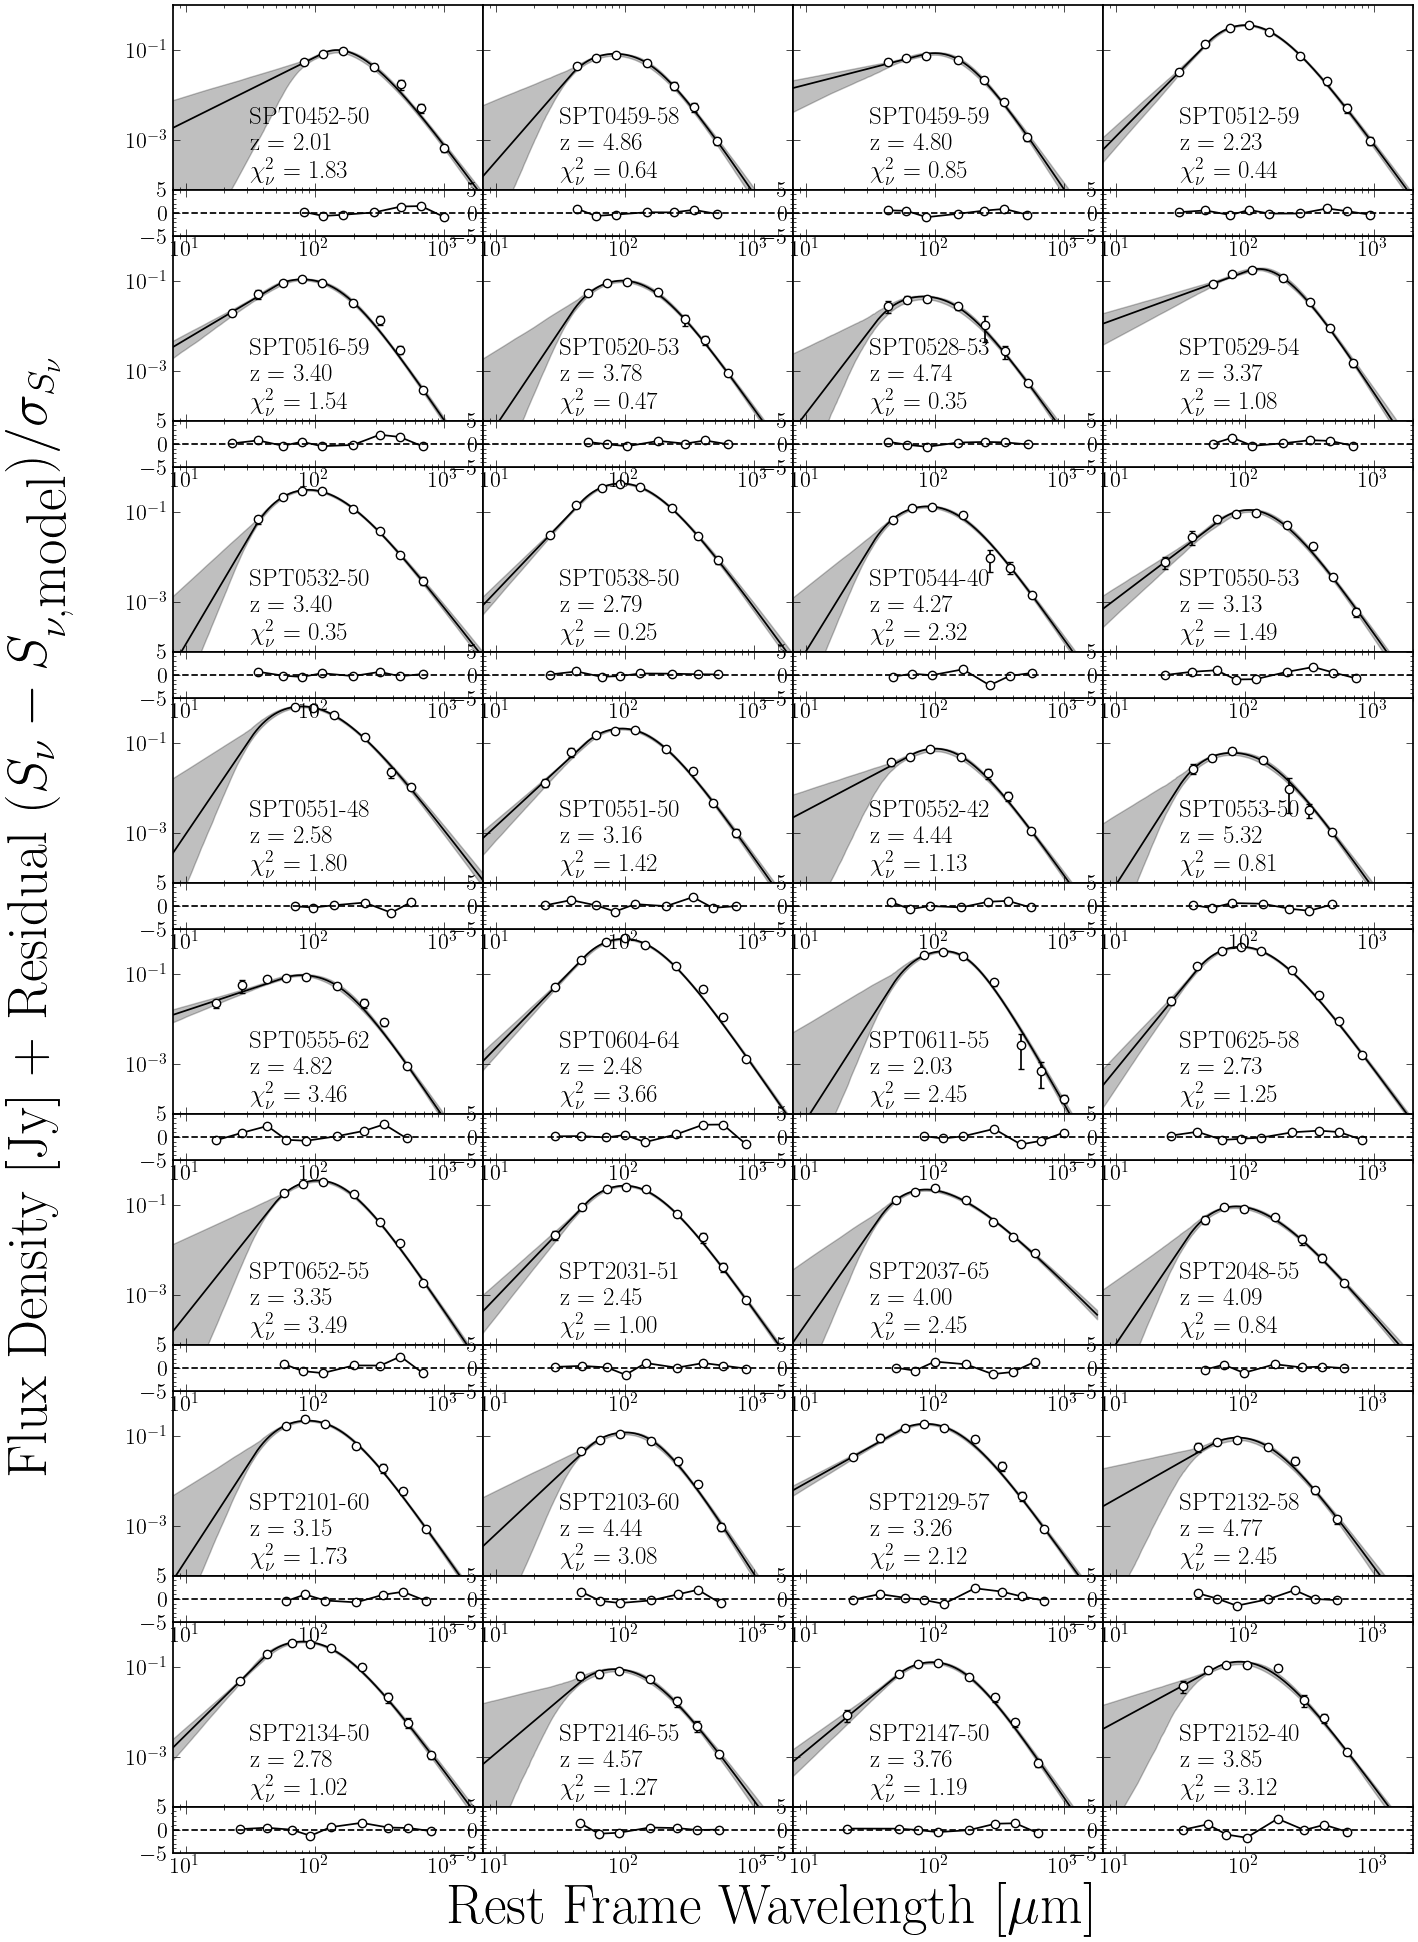

In [14]:
# SPT - Part 2
plot_grid(8, 4, spt_catalogue_go200[32:64], 'k', 'Figure_D_3_part2')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


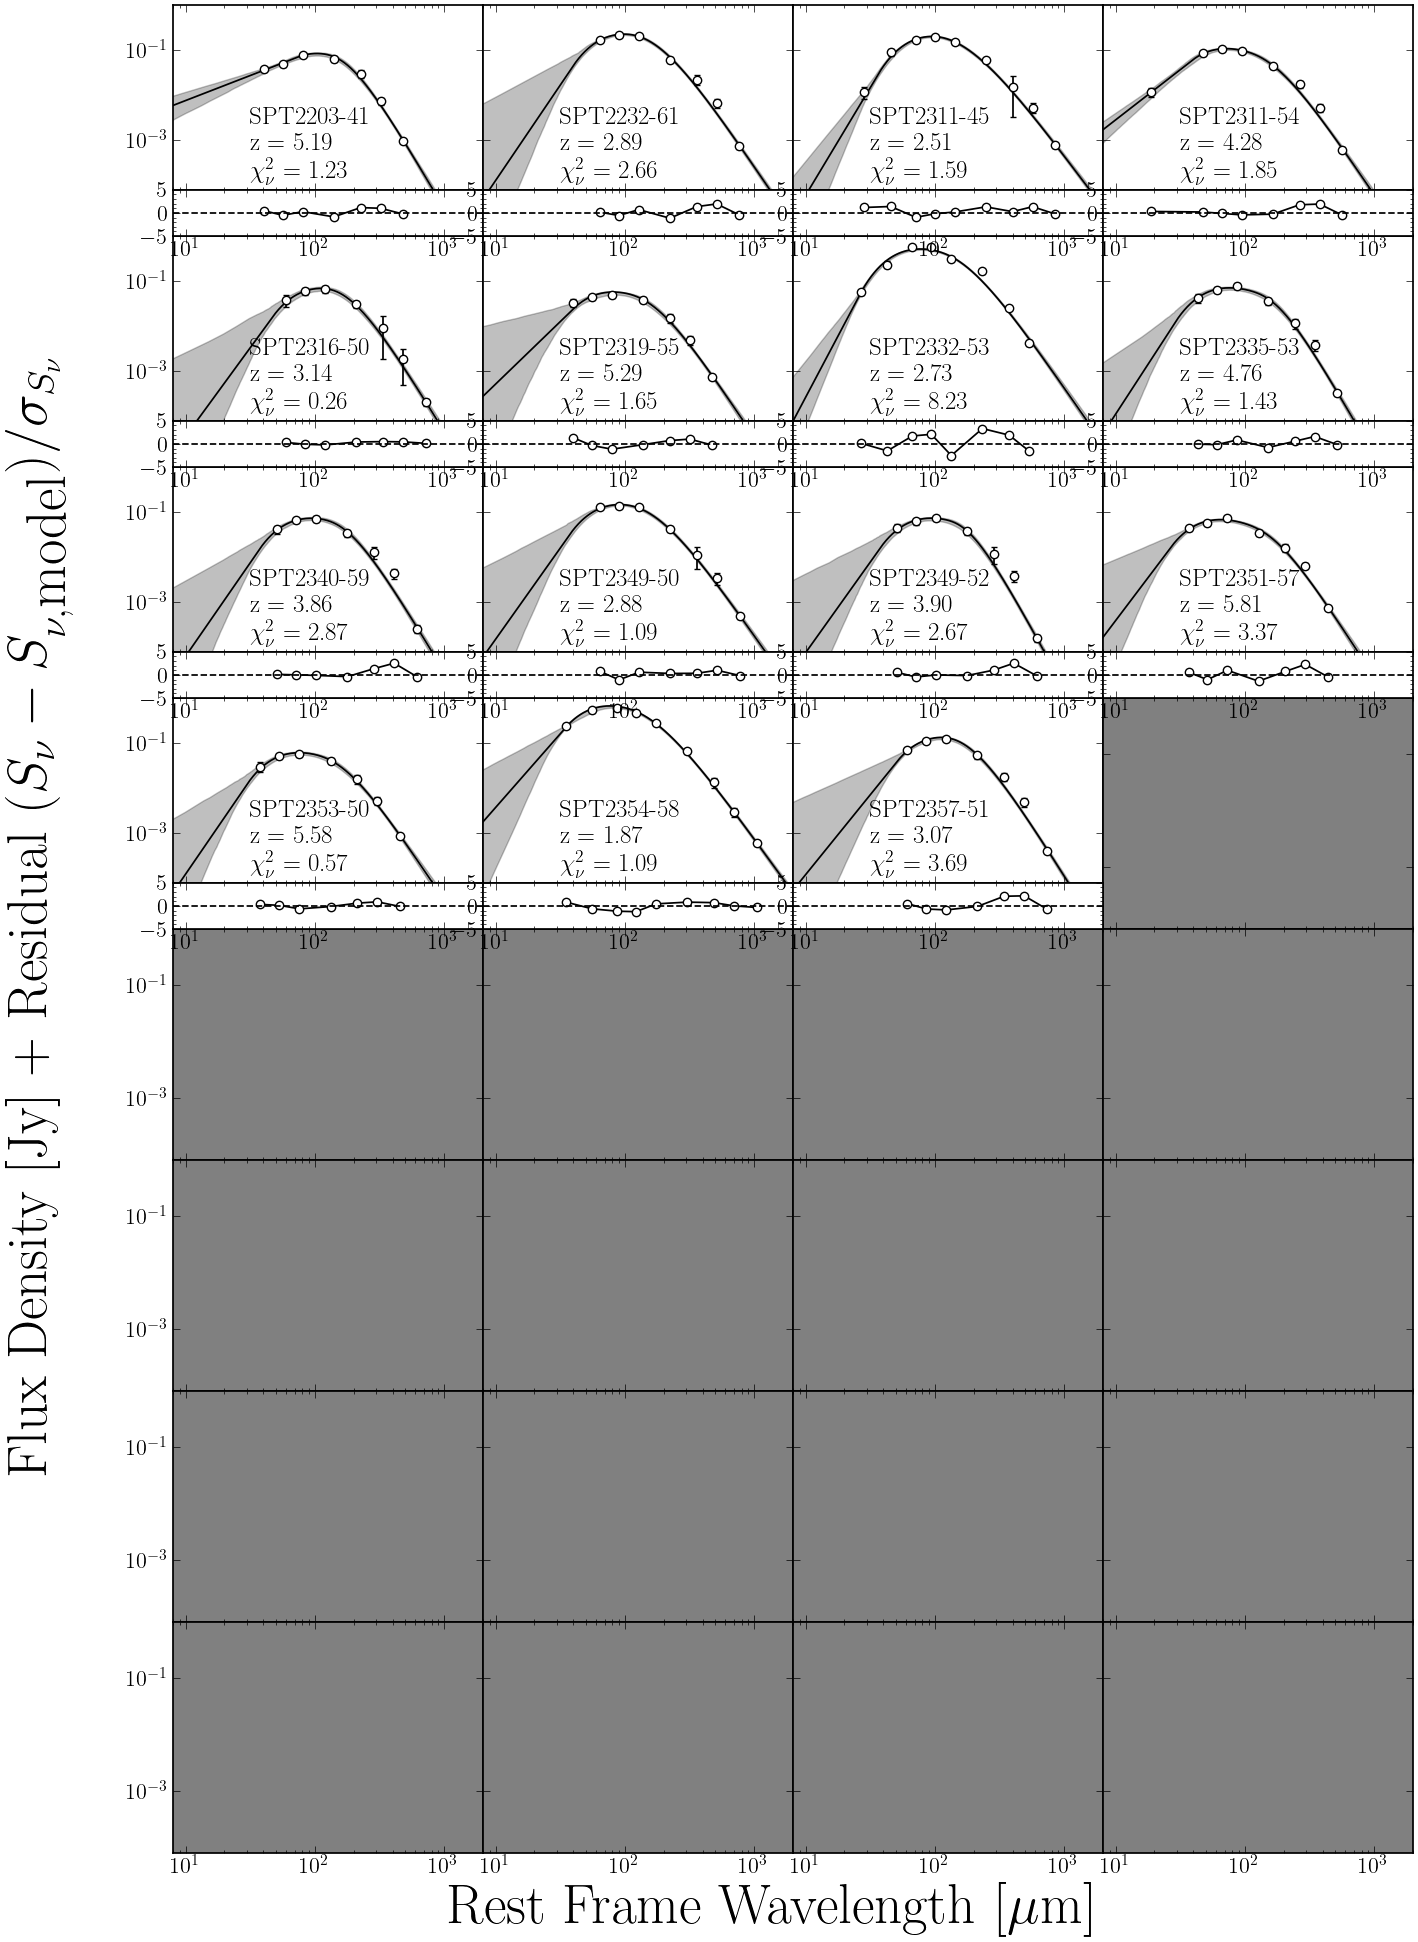

In [15]:
# SPT - Part 3
plot_grid(8, 4, spt_catalogue_go200[64:], 'k', 'Figure_D_3_part3')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


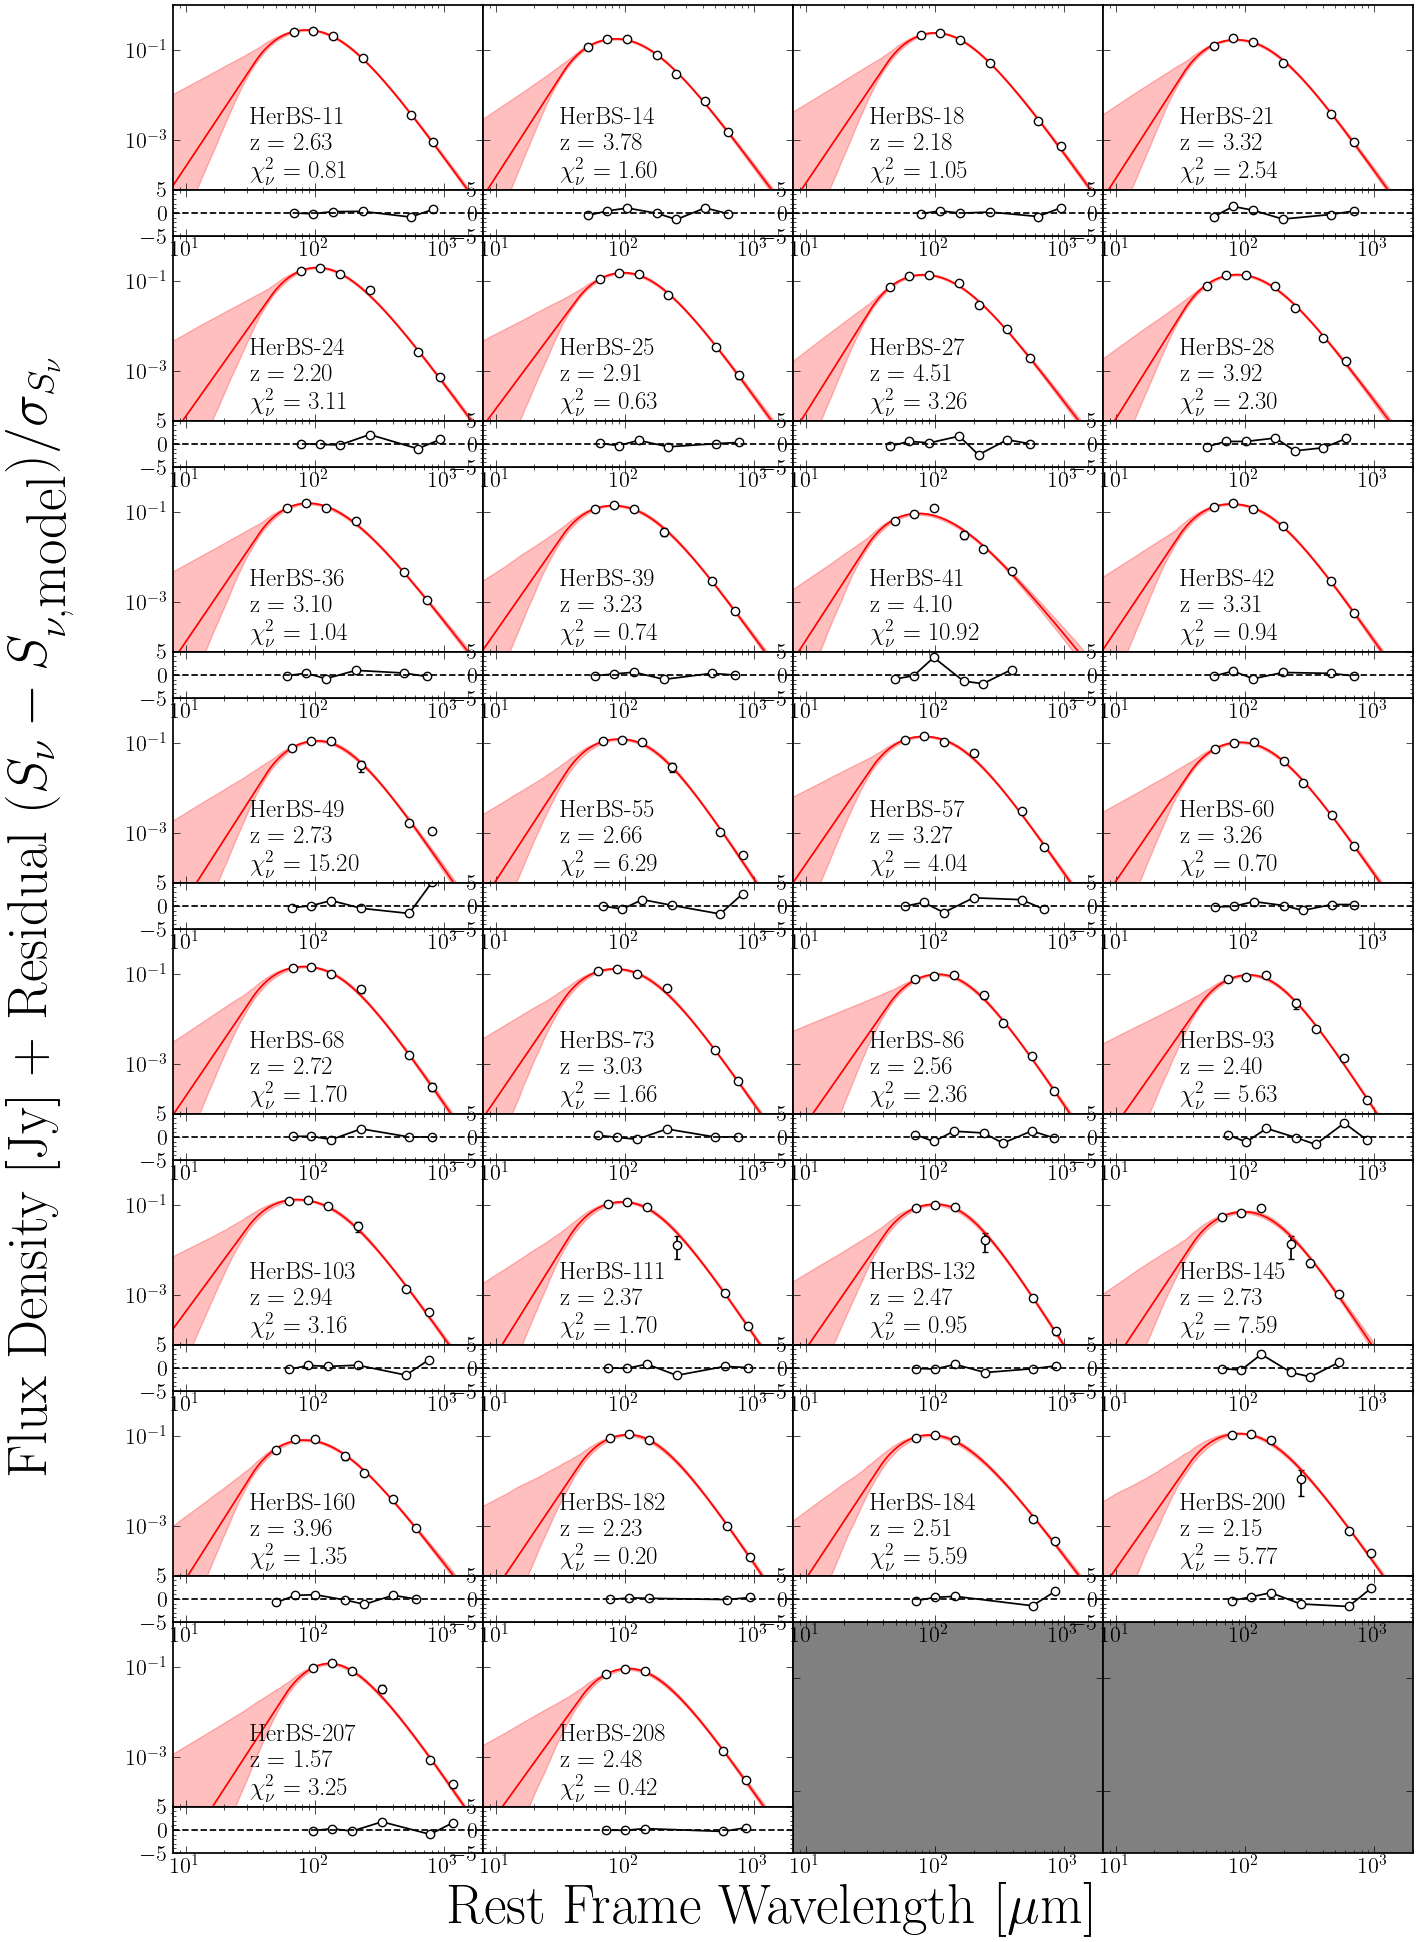

In [16]:
# HerBS
plot_grid(8, 4, herbs_catalogue_go200, 'r', 'Figure_C_3')